In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods import IBU, NPU

In [27]:
from matplotlib.patches import Ellipse

def dist(x,y,x0,y0):
     return np.sqrt((x-x0)** 2 + (y-y0)** 2)

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).

    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False) # does each row represent a variable?
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip


In [29]:
R = np.array([[0.8,0.2],[0.2,0.8]])

In [30]:
N = 100000 #total number of counts
t = np.array([0.5,0.5])*N #truth level distribution
m = [np.random.poisson(t[i]) for i in range(len(t))] #include stat fluctuations
m = np.random.multinomial(m[0],R[:,0])+ np.random.multinomial(m[1],R[:,1]) #include detector resolutions
p = [0.1,0.9] #prior

In [31]:
npu,mle = NPU(m,R,N)

In [20]:
ibu = IBU(m,p,R,15)

In [21]:
nstrap = 10000
straps, r = [], []

for i in range(nstrap):
    m_i = [np.random.poisson(m[i]) for i in range(len(m))]
    # print(m_i)
    ibu_i = IBU(m_i,p,R,15)
    straps.append(ibu_i)
    # r.append( dist( ibu_i[0], ibu_i[1], ibu[0], ibu[1] ) )
    # plt.scatter(ibu_i[0],ibu_i[1], color='grey')
straps = np.asarray(straps)
# r = np.asarray(r)
# print(straps.shape)
# print(npu.shape)

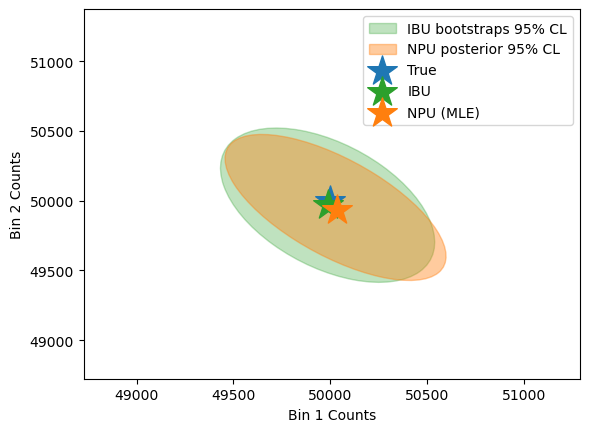

In [40]:
plot_point_cov(straps, nstd=1.8, alpha=0.3, color='tab:green',label="IBU bootstraps 95% CL")
plot_point_cov(npu, nstd=2, alpha=0.4, color='tab:orange',label="NPU posterior 95% CL")
plt.scatter(straps[:,0],straps[:,1], alpha=0.00012, color='tab:green')
plt.scatter(npu[:,0],npu[:,1], alpha=0.0001, color='tab:orange')
# plt.contour([straps[:,0],straps[:,1]]
plt.scatter(t[0],t[1], marker='*', label="True",s=500, color='tab:blue')
plt.scatter(ibu[0],ibu[1], marker='*', label="IBU",s=500, color='tab:green')
plt.scatter(mle[0],mle[1], marker='*', label="NPU (MLE)",s=500, color='tab:orange')
plt.legend()
plt.xlabel("Bin 1 Counts")
plt.ylabel("Bin 2 Counts")
plt.savefig('2bin.pdf', bbox_inches='tight')

Text(0.5, 0, 'Bin 1 Counts')

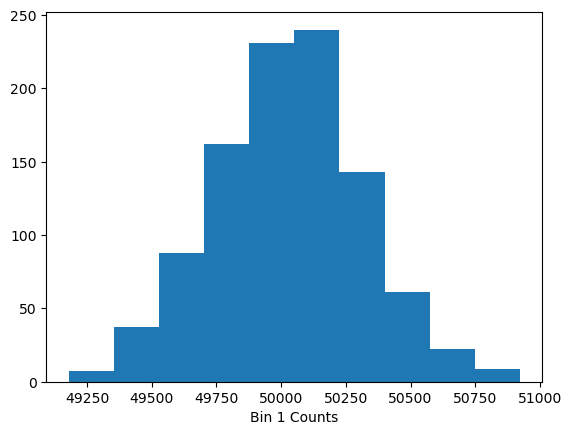

In [41]:
plt.hist(npu[:,0])
plt.xlabel("Bin 1 Counts")

In [43]:
R2 = np.array([[0.5,0.5],[0.5,0.5]])

In [44]:
t2 = np.array([0.5,0.5])*N #true
m2 = [np.random.poisson(t2[i]) for i in range(len(t2))] #stat fluctuations
m2 = np.random.multinomial(m2[0],R2[:,0])+np.random.multinomial(m2[1],R2[:,1]) #resolutions
p2 = [0.1,0.9] #prior

In [45]:
npu2,mle2 = NPU(m2,R2,N)

In [46]:
ibu2 = IBU(m2,p2,R2,10)

In [47]:
nstrap = 1000
straps2 = []

for i in range(nstrap):
    m_i = [np.random.poisson(m2[i]) for i in range(len(m2))]
    # print(m_i)
    ibu_i = IBU(m_i,p,R2,10)
    straps2.append(ibu_i)
    # plt.scatter(ibu_i[0],ibu_i[1], color='grey')
straps2 = np.asarray(straps2)
# print(straps)
# print(npu.shape)

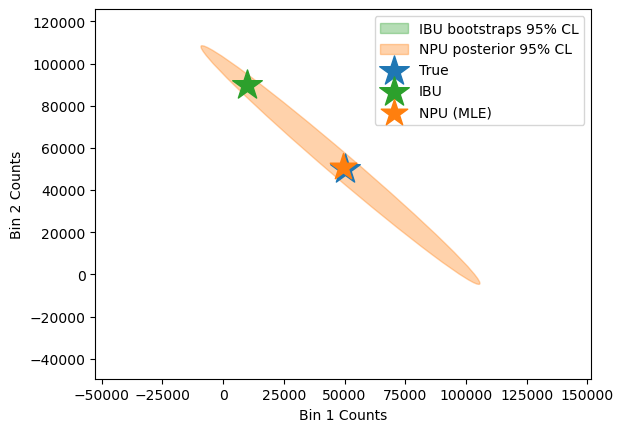

In [50]:
plot_point_cov(straps2, nstd=2, alpha=0.35, color='tab:green',label="IBU bootstraps 95% CL")
plot_point_cov(npu2, nstd=2, alpha=0.35, color='tab:orange',label="NPU posterior 95% CL")
plt.scatter(npu2[:,0],npu2[:,1], alpha=0.0001, color='tab:orange')
plt.scatter(straps2[:,0],straps2[:,1], alpha=0.0001, color='tab:green')
# plt.contour([straps[:,0],straps[:,1]]
plt.scatter(t2[0],t2[1], marker='*', label="True",s=500, color='tab:blue')
plt.scatter(ibu2[0],ibu2[1], marker='*', label="IBU",s=500, color='tab:green')
plt.scatter(mle2[0],mle2[1], marker='*', label="NPU (MLE)",s=400, color='tab:orange')
plt.legend()
plt.xlabel("Bin 1 Counts")
plt.ylabel("Bin 2 Counts")
plt.savefig('2bin_degenerateResp.pdf', bbox_inches='tight')

Text(0.5, 0, 'Bin 1 Counts')

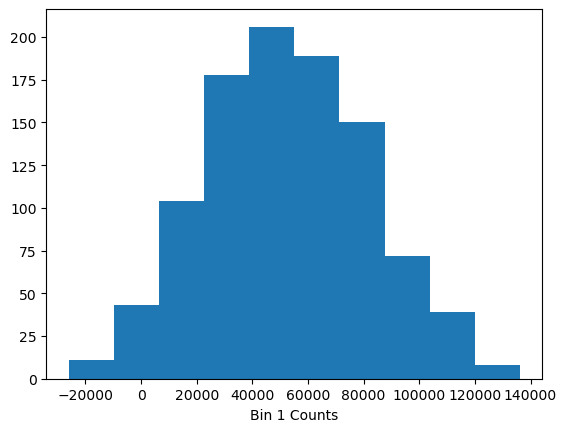

In [76]:
plt.hist(npu2[:,0])
plt.xlabel("Bin 1 Counts")